In [1]:
import numpy as np
from src import config
from src import MyUtil as myUtil
print('done import')

done import


In [4]:
recordNames = config.NAME_OF_RECORD
numRecord = len(recordNames)
numTrain = config.NUMBER_OF_TRAIN_RECORD
trainRqa = []
trainLabel = []

# for iRecord in range(0, numTrain):
for iRecord in range(10, 35):
    rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'train')
    trainRqa = np.append(trainRqa, rqa, axis=0) if len(trainRqa) > 0 else rqa
    trainLabel = np.append(trainLabel, label, axis=0) if len(trainLabel) > 0 else label



In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(trainRqa)
print('done fit')




done fit


[[ 95.87864617  -3.25870353]
 [ 28.03780505  -0.54596727]
 [-47.95040867   5.92214979]
 ...
 [ 17.74389339  -9.5057255 ]
 [ 69.39350458 -16.86133032]
 [122.53617546 -21.94053739]]


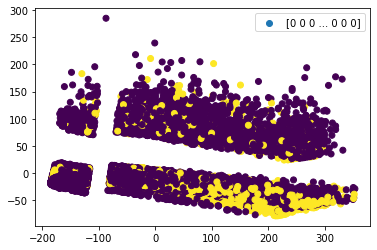

In [12]:

transform = pca.transform(trainRqa)
print(transform)

import matplotlib.pyplot as plt
# print(transform[:, 0])
plt.scatter(transform[:, 0], transform[: ,1], c=trainLabel, label=trainLabel)
plt.legend()
# plt.scatter(transform[:, 0], transform[: ,1])
# plt.show()

In [3]:


testRqa = []
testLabel = []
for iRecord in range(25, 26):
    rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'test')
    testRqa = np.append(testRqa, rqa, axis=0) if len(testRqa) > 0 else rqa
    testLabel = np.append(testLabel, label, axis=0) if len(testLabel) > 0 else label
print('done load data')


done load data


In [3]:
print('trainRqa: ', trainRqa.shape)
# print(trainRqa[-10:])
print('trainLabel: ', trainLabel.shape)
print('testRqa: ', testRqa.shape)
# print(testRqa[-10:])
print('testLabel: ', testLabel.shape)

unique, count = np.unique(trainLabel, return_counts=True)
print('trainLabel unique: ', dict(zip(unique, count)))
unique, count = np.unique(testLabel, return_counts=True)
print('testLabel unique: ', dict(zip(unique, count)))

trainRqa:  (16189, 9)
trainLabel:  (16189,)
testRqa:  (4362, 9)
testLabel:  (4362,)
trainLabel unique:  {0: 8440, 1: 7749}
testLabel unique:  {0: 3980, 1: 382}


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainRqa, trainLabel)

print('done fit')

done fit


In [6]:

testRqa = []
testLabel = []
for iRecord in range(25, 26):
    rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'test')
    testRqa = np.append(testRqa, rqa, axis=0) if len(testRqa) > 0 else rqa
    testLabel = np.append(testLabel, label, axis=0) if len(testLabel) > 0 else label
print('done load data')

done load data


In [7]:
# from hpsklearn import HyperoptEstimator, extra_trees
# from hyperopt import tpe
#
# estim = HyperoptEstimator(classifier=clf,
#                           algo=tpe.suggest,
#                           max_evals=10,
#                           trial_timeout=300)
# estim.fit(trainRqa, trainLabel)
# print(estim.best_model())


# print('param: ', clf.get_params())

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
100%|██████████| 10/10 [00:03<00:00,  3.33trial/s, best loss: 0.4150710315009265]
{'learner': DecisionTreeClassifier(), 'preprocs': (MinMaxScaler(feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
param:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [15]:
for start in range(0, 15):
    print(start, '--------------------------------------')
    testRqa = []
    testLabel = []
    for iRecord in range(start, start+1):
        rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'test')
        testRqa = np.append(testRqa, rqa, axis=0) if len(testRqa) > 0 else rqa
        testLabel = np.append(testLabel, label, axis=0) if len(testLabel) > 0 else label
    unique, count = np.unique(testLabel, return_counts=True)
    print('testLabel unique: ', dict(zip(unique, count)))
    print('done load data')

    from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

    pre = clf.predict(testRqa)
    # print('pre: ', pre)
    test = accuracy_score(testLabel, pre)
    print(test)

    print('recall: ', recall_score(testLabel, pre))
    print('percision: ', precision_score(testLabel, pre))
    print('confusion_matrix: \n', confusion_matrix(testLabel, pre))
    print('done Test')



0 --------------------------------------
testLabel unique:  {0: 12, 1: 469}
done load data
0.6715176715176715
recall:  0.6673773987206824
percision:  0.9936507936507937
confusion_matrix: 
 [[ 10   2]
 [156 313]]
done Test
1 --------------------------------------
testLabel unique:  {0: 70, 1: 161}
done load data
0.45021645021645024
recall:  0.2484472049689441
percision:  0.8695652173913043
confusion_matrix: 
 [[ 64   6]
 [121  40]]
done Test
2 --------------------------------------
testLabel unique:  {0: 266, 1: 245}
done load data
0.7808219178082192
recall:  0.726530612244898
percision:  0.7982062780269058
confusion_matrix: 
 [[221  45]
 [ 67 178]]
done Test
3 --------------------------------------
testLabel unique:  {0: 33, 1: 452}
done load data
0.8041237113402062
recall:  0.8097345132743363
percision:  0.976
confusion_matrix: 
 [[ 24   9]
 [ 86 366]]
done Test
4 --------------------------------------
testLabel unique:  {0: 162, 1: 276}
done load data
0.6940639269406392
recall:  0.62